In [79]:
%matplotlib inline

import os
import sys

from IPython import display

import numpy as np
import pandas as pd
import xarray as xr

import rtmtools.lblrtm.visualisation as viz

import matplotlib.pyplot as plt

In [2]:
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'lblnew_20160916_tmp')

path_meank = os.path.join(dir_run, 'absmean.dat')
path_gk = os.path.join(dir_run, 'gk.dat')

path_trang = os.path.join(dir_run, 'trang.dat')
path_trang_in = os.path.join(dir_run, 'trang_in_irflux.dat')
path_fluxg = os.path.join(dir_run, 'fluxg.dat')
path_fluxg_in = os.path.join(dir_run, 'fluxg_in_irflux.dat')

path_bubd = os.path.join(dir_run, 'bubd.dat')

In [11]:
DICT_FORT = {'flug': 23,
             'fldg': 24, 
             'fnetg': 22,
             'coolrg': 25,
             'sfu': 27,
             'sfd': 26,
             'fnet': 28, 
             'coolr': 29}

In [50]:
# for loading `fnetg`

path_file = os.path.join(dir_run, 'fort.{fnetg:d}'.format(**DICT_FORT))
df = pd.read_csv(path_file, header=None)

n_layer, n_g = 75, 4

n_level = n_layer + 1
df = pd.DataFrame(df.values.reshape(n_g, n_level).transpose())
df.index = range(1, n_level + 1)
df.index.names = ['level']
df.columns = range(1, n_g + 1)
df.columns.names = ['ig']

da_fnetg = xr.DataArray(df)

In [51]:
# for loading `coolrg`

path_file = os.path.join(dir_run, 'fort.{coolrg:d}'.format(**DICT_FORT))
df = pd.read_csv(path_file, header=None)

n_layer, n_g = 75, 4

df = pd.DataFrame(df.values.reshape(n_g, n_layer).transpose())
df.index = range(1, n_layer + 1)
df.index.names = ['layer']
df.columns = range(1, n_g + 1)
df.columns.names = ['ig']

da_coolrg = xr.DataArray(df)

In [52]:
# for loading `fnet`
path_file = os.path.join(dir_run, 'fort.{fnet:d}'.format(**DICT_FORT))
df = pd.read_csv(path_file, header=None)

n_layer = 75
n_level = n_layer + 1

df.index = range(1, n_level + 1)
df.index.names = ['level']

df.columns = ['total']
df.columns.names = ['ig']

da_fnet = xr.DataArray(df)

In [3]:
# for loading fluxg.dat --- `flu`, `fld`
df = pd.read_csv(path_fluxg, sep=r'\s+', index_col=list(range(3)))
ds_fluxg = xr.Dataset.from_dataframe(df)

In [54]:
### plot some stuff

In [57]:
climaviz.plot_DataArray?

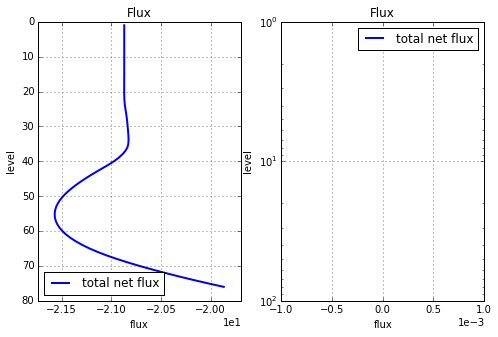

In [72]:
srs = da_fnet.to_pandas().squeeze()
srss = [srs]
fig = viz.plot_pdseries_indexVSvalues_linearlog(srss=srss,
                                                names=['total net flux'],
                                                linestyles=['-'], 
                                                colours=['b'],
                                                ylabel='level',
                                                xlabel='flux',
                                                title='Flux')

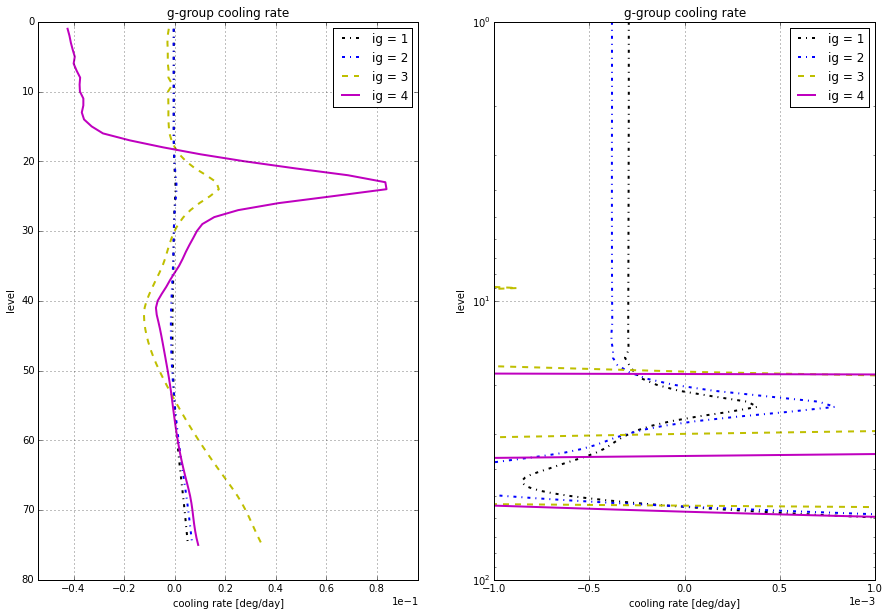

In [78]:
srss = [da_coolrg.sel(ig=ig).to_pandas() 
        for ig in range(1, n_g + 1)]

colours, linestyles = zip(*viz.matplotlib_colour_linestyle_tuples(N=n_g))

names = ['ig = {}'.format(ig) for ig in range(1, n_g + 1)]

ylabel = 'level'
xlabel = 'cooling rate [deg/day]'

title = 'g-group cooling rate'

fig = viz.plot_pdseries_indexVSvalues_linearlog(srss=srss,
                                                names=names,
                                                colours=colours,
                                                linestyles=linestyles,
                                                ylabel=ylabel,
                                                xlabel=xlabel,
                                                title=title,
                                                figsize=(15, 10))

In [80]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')